## Best Factors in Explaining Tips: A STAT 301 Case Study Project

**Group members:** Wanqing Hu, Jia Xin Tan, Jiaming Chang, Iris Caglayan

**Course:** STAT 301 102, 2024-2025 Winter Term 2

**Date:** 15 April 2025

In [ ]:
# Load packages
library(tidyverse)
library(ggplot2)
library(dplyr)
library(broom)
library(repr)
library(httr)
library(jsonlite)
library(MASS)

### Introduction

In North America, tips are a customary amount of money given to the staff at dining establishments as a form of compliment or token of appreciation for their service. Typically, they are calculated as a percentage of the meal's price or customised based on consumers' discretion. Tipping behaviour is a subject of great interest across business industries and the social sciences as people understandably want to figure out how to earn more money and understand this interesting social phenomenon. Existing studies such as those by Michael Lynn, explore how tipping in the United States is influenced by people's beliefs across various situations (2015). Other studies study how tipping outcomes vary by gender and how this reflects differences in altruism (Parrett, 2023). 

Given the restaurant tips dataset from kaggle (Badole, 2025), it would be fruitful to explore the relationships between several variables and the tipping amount in order to try and understand what really drives tipping behaviour. The studies mentioned above explore the tipping phenomenon from a socio-psychological perspective which we would like to find out given that our dataset has variables such as whether the tipper is a smoker and the gender of the tipper. However, we would also like to explore more of the practical aspects - the time or day when customers have a meal and how large their party size is - and their relation to the amount of tips given. The relationship between tips and gender has been explored in prior literature, but there is not much research that has been done exploring the variety of variables available in this tips dataset. This project thus seeks to find out which set of these input variables best explain the variation in the amount of tips. The primary goal of this investigation is inference. Results could potentially be useful for restaurants to adjust their marketing strategies and optimise their returns from service. Finding out which factors interact significantly with tip amounts would also be advantageous for developing future predictive algorithms that aim to predict amount of tips based on consumer transaction data.

##### Data Description
This dataset is obtained from https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset.

Collected from a popular restaurant over a specified period, this dataset looks into the tipping behavior in a restaurant setting. In this dataset, there are in total 244 observations, and 7 variables.
    
Table of variables used:
| Variable Name | Discription | Type |
| :---: | :---: | :---: |
|total_bill| total bill amount in dollars|Numerical, independent variable|
|sex| Gender of the person paying the bill (Male/Female)|Categorical, independent variable|
|smoker|Whether the person is a smoker (Yes/No) |Categorical, independent variable|
|day|Day of the week when the transaction took place (Thur/Fri/Sat/Sun)|Categorical, independent variable|
|time|Time of day when the transaction took place (Lunch/Dinner)|Categorical, independent variable|
|size|Size of the dining party (number of people)|Numerical, independent variable|
|tip|Tip amount in dollars|Numerical, target variable|

##### Research Question

*Which set of input variables available in the tips dataset best explain the variation in the amount of tips?*

### Methods and Results

#### Exploratory Data Analysis (EDA)

In [ ]:
# read data into R
url <- "https://raw.githubusercontent.com/JustinTrenchcoat/STAT_301_Personal_Project/refs/heads/main/tips.csv"
data_tips <- read.csv(url(url), header = TRUE)
head(data_tips)
tail(data_tips)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
239,35.83,4.67,Female,No,Sat,Dinner,3
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2
244,18.78,3.00,Female,No,Thur,Dinner,2


The dataset is already in tidy format.

In [ ]:
# convert character variables into factors
data_tips$sex <- as.factor(data_tips$sex)
data_tips$smoker <- as.factor(data_tips$smoker)
data_tips$day <- as.factor(data_tips$day)
data_tips$time <- as.factor(data_tips$time)

In [ ]:
cat("Dataset contains", nrow(data_tips), "observations and", ncol(data_tips), "variables.\n\n")
summary_table <- tibble(
  variable = names(data_tips),
  type = sapply(data_tips, function(x) class(x)[1]),
  n_levels = sapply(data_tips, function(x) if(is.factor(x)) nlevels(x) else NA),
  have_NA = sapply(data_tips, function(x) any(is.na(x)))
)
summary_table

Dataset contains 244 observations and 7 variables.



variable,type,n_levels,have_NA
<chr>,<chr>,<int>,<lgl>
total_bill,numeric,NA,FALSE
tip,numeric,NA,FALSE
sex,factor,2,FALSE
smoker,factor,2,FALSE
day,factor,4,FALSE
time,factor,2,FALSE
size,integer,NA,FALSE


Above is a summary table for our dataset. Except for `tip`, we have 4 categorical variables and 2 numerical variables. There are no missing values.

### Visualization 1

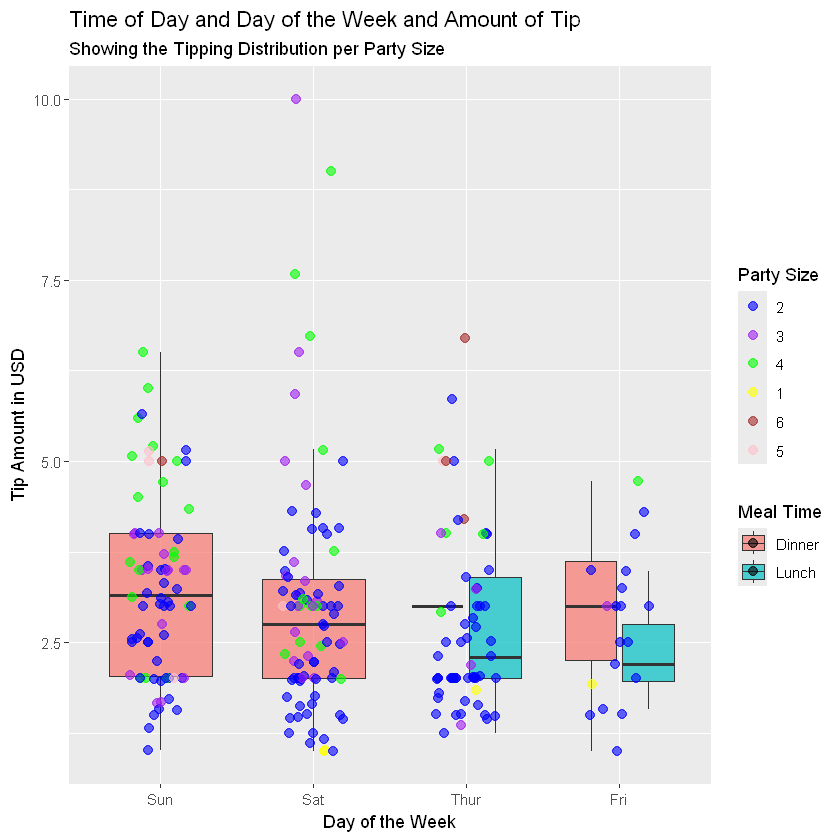

In [ ]:
# Main developer: Iris Caglayan
# Contributor: Wanqing Hu

# transform size into factor type for visualization
data_size_as_fac <- data_tips %>% mutate(
    day = factor(day, levels = unique(day)),
    time = as.factor(time),
    size = factor(size, levels= unique(size))
)

visualization <- ggplot(data_size_as_fac, aes(x = day, y = tip, fill = time)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) + 
  geom_jitter(aes(color = size), width = 0.2, alpha = 0.6, size = 2.5) +  # Transparent and smaller points
  scale_color_manual(values = c("1"="yellow", "2"="blue", "3"="purple", "4"= "green", "5"="pink", "6"= "brown")) +  
labs(
    title = "Time of Day, Day of the Week and Amount of Tip",
      subtitle = "Showing the Tipping Distribution per Party Size",
    x = "Day of the Week",
    y = "Tip Amount in USD",
    fill = "Meal Time",
    color = "Party Size"
  )
visualization

This plot shows how tip amounts vary across days and meal times, with point color indicating party size. The range of tips differs by day of the week, with Saturday showing several higher values. Additionally, tips tend to be larger during dinner compared to lunch.

### Visualization 2

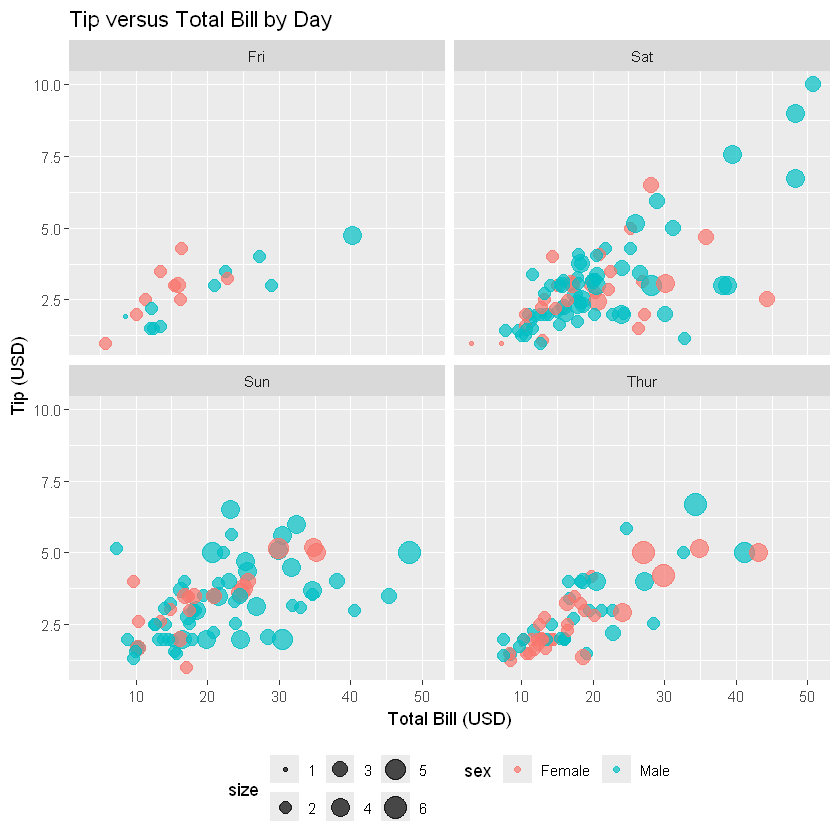

In [ ]:
# Main developer: Wanqing Hu
# Contributor: Wanqing Hu

ggplot(data_tips, aes(x = total_bill, y = tip, color = sex, size = size)) +
  geom_point(alpha = 0.7) +
  facet_wrap(~ day, nrow = 2) +
  labs(
    title = "Tip versus Total Bill by Day",
    x = "Total Bill (USD)", 
    y = "Tip (USD)"
  ) +
  theme(legend.position = "bottom")

This graph shows the relationship between tip and total bill, with point size indicating party size and color representing gender. There appears to be a strong linear association between total bill and tip. While a few high tips are visible on Saturday, they are reasonable within the context of the data and not extreme relative to other points. Therefore, no transformations or removals will be applied to our data.

#### Plan

##### Method:
1. Data would be splited into two portions with rate of 70%-30%, to create a training set and selection set.
2. The backward selection algorithm is deployed to to construct a multiple linear regression model using the training set, and models with different set of explanatory varibables would be evaluated with AIC. 
3. The multiple $R^2$ will be used to evaluate the model by calculating the proportion of the variation in tips explained by the model when applied to the selection set.   

##### Justification of Method Used:
Given that we want to find out which set of explanatory variables from the total set given are significant for model-fitting and making inferences, starting off with the full set of available input variables and eliminating from there makes sense since there are only 6 input variables and the computational effort required is reasonable. Previous exploratory data analysis and subsequent discussion within the group have revealed that there is insufficient data for proper comparison within categories - for example, insufficient lunch and dinner data for certain days of the week as seen from Visualisation 1. Hence, using a criterion that selects categorical variables as a whole rather than by specific levels would be better in this case because there is not enough information to accurately make such specific selections. A multiple linear regression is used because the response variable, amount of tips given, is a continuous variable and there are several input variables that are being taken into account. The multiple $R^2$ is used for model evaluation because it evaluates the proportion of the variance of the amount of tips (response variable) explained by the model with penalisation to compensate for the model's size. This allows us to check if the model fits the data well enough for inferences to be made.

##### Assumptions required:
* There is a linear relationship between the response and input variables.
* Errors are independent of each other
* The conditional distribution of error terms is normal
* The variance of the error terms are approximately equal
* No multicollinearity exists among the variables

In [ ]:
# Main developer: Jia Xin Tan
# Contributor: Jiaming Chang

# set up random see
set.seed(120)

# tidy the data: change the data type from strings to factors
tips_tidied <- data_tips |> 
    mutate(sex = factor(sex),
           smoker = factor(ifelse(smoker == "Yes", "Smoker", "Non-smoker")),
           day = factor(day),
           time = factor(time), 
           size = factor(size))

In [ ]:
# Main developer: Jia Xin Tan
# Contributor: Jiaming Chang

# Data splitting process: 
# 70% of the data is splitted from the whole dataset, stored as `tips_train`, and used for backward selection process.
# the other 30% of dataset is stored as `tips_select` for evaluation.
tips_sample <- 
    tips_tidied |>
    mutate(id = row_number())

tips_train <- tips_sample |> 
    slice_sample(prop = 0.7, replace = FALSE)

tips_select <- tips_sample |>
    anti_join(tips_train, by = "id")

tips_train <- tips_train |> 
    dplyr::select(- "id")

tips_select <- tips_select |>
    dplyr::select(- "id")

In [ ]:
# Main developer: Jia Xin Tan
# Contributor: Jiaming Chang

# Backward selection process, the metric is BIC
tips_model <- lm(tip ~ ., data = tips_train)
n <- nrow(tips_train)
tips_null <- lm(tip ~ 1, data = tips_train)

# Run stepwise selection with BIC (k = log(n))
tips_bwd_bic <- stepAIC(tips_model, 
                       direction = "backward",
                       k = log(n), 
                       trace = 2)   # Set to 2 for detailed output
summary(tips_bwd_bic)

Start:  AIC=69.04
tip ~ total_bill + sex + smoker + day + time + size

             Df Sum of Sq    RSS     AIC
- size        5     4.316 176.60  47.563
- day         3     2.713 175.00  56.285
- time        1     0.037 172.32  63.937
- sex         1     0.039 172.32  63.939
- smoker      1     0.237 172.52  64.134
<none>                    172.29  69.036
- total_bill  1    65.548 237.83 118.711

Step:  AIC=47.56
tip ~ total_bill + sex + smoker + day + time

             Df Sum of Sq    RSS     AIC
- day         3     2.622 179.22  34.661
- time        1     0.015 176.62  42.442
- sex         1     0.190 176.79  42.611
- smoker      1     0.901 177.50  43.293
<none>                    176.60  47.563
- total_bill  1   120.388 296.99 130.793

Step:  AIC=34.66
tip ~ total_bill + sex + smoker + time

             Df Sum of Sq    RSS     AIC
- time        1     0.021 179.25  29.546
- sex         1     0.115 179.34  29.635
- smoker      1     2.326 181.55  31.718
<none>                    17


Call:
lm(formula = tip ~ total_bill, data = tips_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1506 -0.5715 -0.1240  0.4466  3.8546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.988626   0.200303   4.936 1.91e-06 ***
total_bill  0.101492   0.009329  10.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.04 on 168 degrees of freedom
Multiple R-squared:  0.4133,	Adjusted R-squared:  0.4099 
F-statistic: 118.4 on 1 and 168 DF,  p-value: < 2.2e-16


##### Visualization of variable selection process

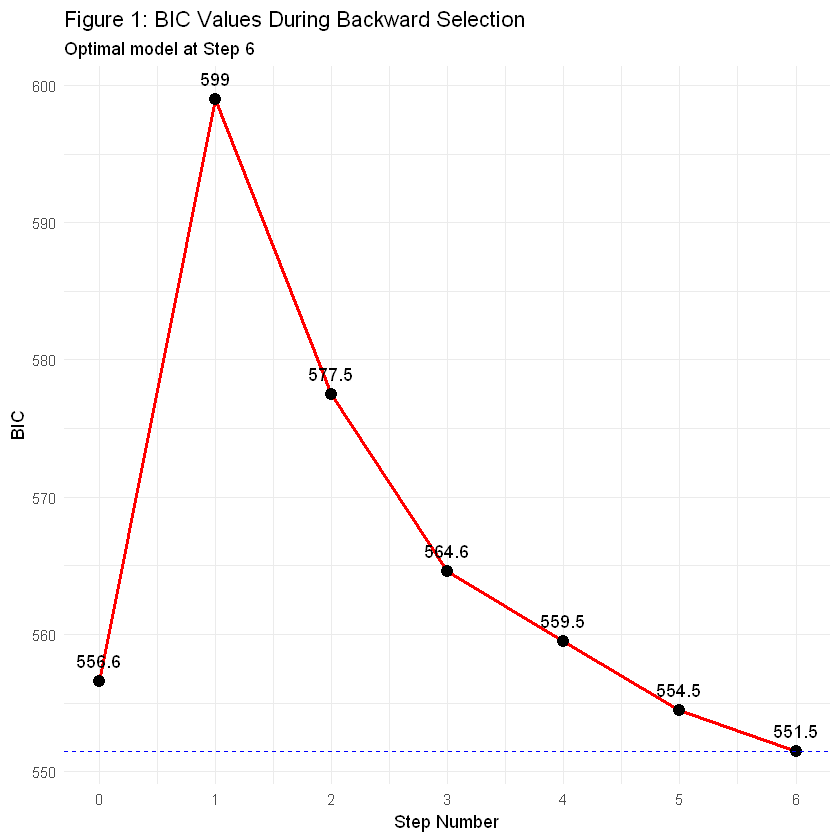

In [ ]:
# Main developer: Jiaming Chang
# Contributor: Jiaming Chang

# Extract BIC values for each step.
bic_values <- c(BIC(tips_model), tips_bwd_bic$anova$AIC + (log(n)-2)*(n-1))
plot_data <- data.frame(
  Step = 0:(length(bic_values)-1),
  BIC = bic_values
)

# Plot the steps and BIC value for stepwise selection
ggplot(plot_data, aes(x = Step, y = BIC)) +
  geom_line(color = "red", linewidth = 1) +
  geom_point(color = "black", size = 3) +
  geom_hline(yintercept = min(bic_values), linetype = "dashed", color = "blue") +
  labs(title = "Figure 1: BIC Values During Backward Selection",
       subtitle = paste("Optimal model at Step", which.min(bic_values)-1),
       x = "Step Number",
       y = "BIC") +
  theme_minimal() +
  scale_x_continuous(breaks = plot_data$Step) +
  geom_text(aes(label = round(BIC, 1)), vjust = -1)

In [ ]:
# Main developer: Jia Xin Tan
# Contributor: Jiaming Chang

# Evaluate the model with the 30% of original dataset
tips_select_bwd <- lm(tip ~ total_bill, tips_select)

# print out information for this evaluation
tips_eval <- summary(tips_select_bwd)
tips_eval


Call:
lm(formula = tip ~ total_bill, data = tips_select)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3487 -0.5653 -0.0249  0.5179  3.1231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.79479    0.26596   2.988  0.00383 ** 
total_bill   0.11144    0.01199   9.293 5.96e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.991 on 72 degrees of freedom
Multiple R-squared:  0.5454,	Adjusted R-squared:  0.539 
F-statistic: 86.36 on 1 and 72 DF,  p-value: 5.956e-14


##### Interpretation of results:
As seen from the analysis above, the chosen model unexpectedly ends up as a single linear regression with only one input variable, total bill, chosen. The multiple R-squared is 0.5454, which means the total bill is associated with about 54.54% of the variation in tip amount - a moderate association. The fact that only total bill was selected could mean potential multicollinearity with the other input variables or that there is a lack of strong relationships between the other input variables and the amount of tips given. 

Since the final model contains only one covariate, it is clear that the model does not contain variables with high collinearity. 

### Discussion

The main goal of this project was to identify the factors that have a stronger relationship with tipping behavior. Surprisingly, the final model suggested total bill as the only significant predictor. This variable accounts for about 54.54% of the variation in tip amounts within the selected dataset. The final model excluded other variables—such as gender, smoker status, day, time, and party size—that did not significantly influence the tip amount. These results suggest that the total bill amount is the strongest—and maybe only significant—predictor of the tip amount in this dataset.

Studies by Lynn (2015) and Parrett (2023) have underlined the influence of sociopsychological factors—including smoking status and gender—on tipping behavior. However, within this dataset, the suggested sociopsychological relationship on tipping behavior was not observed. This might be because this effect is not significant enough to notice, hidden by multicollinearity, or unevenly represented in the dataset (for example, on certain days, there are far more dinner data than lunch data (Visualization 1)). This research could be improved in various ways. First, using a more balanced dataset with an even representation of the data. The dataset's imbalance and relatively small size could have limited the model's ability to detect more subtle correlations and generalizability to different conditions. Additionally, to improve the strength of association and address model concerns, including interaction terms — such as between time and day or between gender and smoker status — might lead to the identification of significant relationships between input variables that were not captured by our additive model.

These findings point to several interesting directions for future studies. First, examining the influence of cultural or geographical data on tipping culture could be one area of study. For example, while tipping higher amounts — approximately 20% —  is culturally ingrained, tipping is less prevalent and usually more modest in many European cultures. Secondly, including socioeconomic and in-depth psychological factors will help close the gap between monetary predictors and the more complicated sociopsychological causes of tipping behavior. While psychological data can describe personal satisfaction or values, socioeconomic elements might show how tipping is affected by financial ability and knowledge of social norms. These insights can provide a deeper understanding of tipping behavior and enable restaurants to create more focused marketing plans that resonate with their desired customer segment.

Finally, the results of this study demonstrate the anticipated strong correlation between the tipping culture and the total bill amount. Furthermore, the results also show that in order to completely identify and understand the connection between sociopsychological factors and tipping behaviour, a more comprehensive and intricate dataset or an alternative approach to the dataset is required.


### References

* Badole, S. (2025). *Restaurant Tips Dataset*. Retrieved from [https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset](https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset)

* Lynn, M. (2015). Service gratuities and tipping: A motivational framework. *Journal of Economic Psychology*, 46, 74-88. https://doi.org/10.1016/j.joep.2014.12.002

* Parrett, M. (2023). Gender differences in altruism and the price of altruism: Evidence from restaurant tips. *Applied Economics Letters*, 30(8), 1097-1100. https://doi.org/10.1080/13504851.2022.2036678